# Retail Store Inventory
### Problem Statement:
    -Clean inventory data, impute missing unit prices and stock quantities, and generate KPIs like out-of-stock products and category-wise average prices.
    -Key Pandas/NumPy Usage: .interpolate(), .corr(), .merge(), .fillna(method='bfill'), .round(), np.round()

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('retail_inventory.csv')
df = df.copy()
df

,Item_ID,Item_Name,Category,Stock_Quantity,Unit_Price,Last_Stocked_Date
0,101,Table,Apparel,10.0,500.0,2023-11-01
1,102,Sofa,Electronics,10.0,NaN,2023-11-04
2,103,Table,Electronics,NaN,1500.0,2023-11-07
3,104,Shirt,Furniture,30.0,2000.0,2023-11-10
4,105,Sofa,Apparel,NaN,1500.0,2023-11-13
5,106,Shirt,Furniture,NaN,500.0,2023-11-16
6,107,Jeans,NaN,40.0,NaN,2023-11-19
7,108,TV,Cosmetics,40.0,1500.0,2023-11-22
8,109,Shirt,Furniture,20.0,2000.0,2023-11-25
9,110,TV,NaN,NaN,1000.0,2023-11-28


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item_ID            50 non-null     int64  
 1   Item_Name          50 non-null     object 
 2   Category           40 non-null     object 
 3   Stock_Quantity     43 non-null     float64
 4   Unit_Price         42 non-null     float64
 5   Last_Stocked_Date  50 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 2.5+ KB


In [18]:
df.isnull().sum()

Item_ID               0
Item_Name             0
Category             10
Stock_Quantity        7
Unit_Price            8
Last_Stocked_Date     0
dtype: int64

In [19]:
df['Category'] = df['Category'].ffill()

In [20]:
df

,Item_ID,Item_Name,Category,Stock_Quantity,Unit_Price,Last_Stocked_Date
0,101,Table,Apparel,10.0,500.0,2023-11-01
1,102,Sofa,Electronics,10.0,NaN,2023-11-04
2,103,Table,Electronics,NaN,1500.0,2023-11-07
3,104,Shirt,Furniture,30.0,2000.0,2023-11-10
4,105,Sofa,Apparel,NaN,1500.0,2023-11-13
5,106,Shirt,Furniture,NaN,500.0,2023-11-16
6,107,Jeans,Furniture,40.0,NaN,2023-11-19
7,108,TV,Cosmetics,40.0,1500.0,2023-11-22
8,109,Shirt,Furniture,20.0,2000.0,2023-11-25
9,110,TV,Furniture,NaN,1000.0,2023-11-28


In [21]:
df.isnull().sum()

Item_ID              0
Item_Name            0
Category             0
Stock_Quantity       7
Unit_Price           8
Last_Stocked_Date    0
dtype: int64

In [22]:
df.fillna({'Stock_Quantity':0}, inplace=True)

In [23]:
df

,Item_ID,Item_Name,Category,Stock_Quantity,Unit_Price,Last_Stocked_Date
0,101,Table,Apparel,10.0,500.0,2023-11-01
1,102,Sofa,Electronics,10.0,NaN,2023-11-04
2,103,Table,Electronics,0.0,1500.0,2023-11-07
3,104,Shirt,Furniture,30.0,2000.0,2023-11-10
4,105,Sofa,Apparel,0.0,1500.0,2023-11-13
5,106,Shirt,Furniture,0.0,500.0,2023-11-16
6,107,Jeans,Furniture,40.0,NaN,2023-11-19
7,108,TV,Cosmetics,40.0,1500.0,2023-11-22
8,109,Shirt,Furniture,20.0,2000.0,2023-11-25
9,110,TV,Furniture,0.0,1000.0,2023-11-28


In [24]:
df["Stock_Quantity"] = df["Stock_Quantity"].astype(int)

In [25]:
df

,Item_ID,Item_Name,Category,Stock_Quantity,Unit_Price,Last_Stocked_Date
0,101,Table,Apparel,10,500.0,2023-11-01
1,102,Sofa,Electronics,10,NaN,2023-11-04
2,103,Table,Electronics,0,1500.0,2023-11-07
3,104,Shirt,Furniture,30,2000.0,2023-11-10
4,105,Sofa,Apparel,0,1500.0,2023-11-13
5,106,Shirt,Furniture,0,500.0,2023-11-16
6,107,Jeans,Furniture,40,NaN,2023-11-19
7,108,TV,Cosmetics,40,1500.0,2023-11-22
8,109,Shirt,Furniture,20,2000.0,2023-11-25
9,110,TV,Furniture,0,1000.0,2023-11-28


In [26]:
df.fillna({'Unit_Price':df['Unit_Price'].mean().round()}, inplace=True)

In [27]:
df

,Item_ID,Item_Name,Category,Stock_Quantity,Unit_Price,Last_Stocked_Date
0,101,Table,Apparel,10,500.0,2023-11-01
1,102,Sofa,Electronics,10,1274.0,2023-11-04
2,103,Table,Electronics,0,1500.0,2023-11-07
3,104,Shirt,Furniture,30,2000.0,2023-11-10
4,105,Sofa,Apparel,0,1500.0,2023-11-13
5,106,Shirt,Furniture,0,500.0,2023-11-16
6,107,Jeans,Furniture,40,1274.0,2023-11-19
7,108,TV,Cosmetics,40,1500.0,2023-11-22
8,109,Shirt,Furniture,20,2000.0,2023-11-25
9,110,TV,Furniture,0,1000.0,2023-11-28


In [28]:
df.isnull().sum()

Item_ID              0
Item_Name            0
Category             0
Stock_Quantity       0
Unit_Price           0
Last_Stocked_Date    0
dtype: int64

In [30]:
df.to_csv('cleaned_retail_data.csv', index=False)

# INSIGHTS

## You work for a retail chain that wants to optimize stock based on product category and last restocking date.

In [3]:
df_new = pd.read_csv('cleaned_retail_data.csv')
df = df_new.copy()
df

,Item_ID,Item_Name,Category,Stock_Quantity,Unit_Price,Last_Stocked_Date
0,101,Table,Apparel,10,500.0,2023-11-01
1,102,Sofa,Electronics,10,1274.0,2023-11-04
2,103,Table,Electronics,0,1500.0,2023-11-07
3,104,Shirt,Furniture,30,2000.0,2023-11-10
4,105,Sofa,Apparel,0,1500.0,2023-11-13
5,106,Shirt,Furniture,0,500.0,2023-11-16
6,107,Jeans,Furniture,40,1274.0,2023-11-19
7,108,TV,Cosmetics,40,1500.0,2023-11-22
8,109,Shirt,Furniture,20,2000.0,2023-11-25
9,110,TV,Furniture,0,1000.0,2023-11-28


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item_ID            50 non-null     int64  
 1   Item_Name          50 non-null     object 
 2   Category           50 non-null     object 
 3   Stock_Quantity     50 non-null     int64  
 4   Unit_Price         50 non-null     float64
 5   Last_Stocked_Date  50 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 2.5+ KB


In [5]:
df.describe()

,Item_ID,Stock_Quantity,Unit_Price
count,50.00000,50.000000,50.000000
mean,125.50000,17.200000,1273.840000
std,14.57738,14.713592,496.953797
min,101.00000,0.000000,500.000000
25%,113.25000,2.500000,1000.000000
50%,125.50000,10.000000,1274.000000
75%,137.75000,30.000000,1500.000000
max,150.00000,40.000000,2000.000000


### 1. Data Selection & Filtering:
Filter items with stock quantity < 10 or stock quantity = 0.

In [6]:
df.query("Stock_Quantity < 10 or Stock_Quantity == 10")

,Item_ID,Item_Name,Category,Stock_Quantity,Unit_Price,Last_Stocked_Date
0,101,Table,Apparel,10,500.0,2023-11-01
1,102,Sofa,Electronics,10,1274.0,2023-11-04
2,103,Table,Electronics,0,1500.0,2023-11-07
4,105,Sofa,Apparel,0,1500.0,2023-11-13
5,106,Shirt,Furniture,0,500.0,2023-11-16
9,110,TV,Furniture,0,1000.0,2023-11-28
12,113,Perfume,Apparel,0,1500.0,2023-12-07
16,117,Shirt,Furniture,10,2000.0,2023-12-19
18,119,Jeans,Apparel,10,1000.0,2023-12-25
19,120,Shirt,Electronics,0,1000.0,2023-12-28


### 2. Data Transformation:
    1. Add a column Stock_Value = Stock_Quantity × Unit_Price.
    2. Create a flag column Is_Out_Of_Stock.

In [7]:
Stock_Quantity = df['Stock_Quantity']
Unit_Price = df['Unit_Price']
df['Stock_Value'] = Stock_Quantity * Unit_Price

In [8]:
df

,Item_ID,Item_Name,Category,Stock_Quantity,Unit_Price,Last_Stocked_Date,Stock_Value
0,101,Table,Apparel,10,500.0,2023-11-01,5000.0
1,102,Sofa,Electronics,10,1274.0,2023-11-04,12740.0
2,103,Table,Electronics,0,1500.0,2023-11-07,0.0
3,104,Shirt,Furniture,30,2000.0,2023-11-10,60000.0
4,105,Sofa,Apparel,0,1500.0,2023-11-13,0.0
5,106,Shirt,Furniture,0,500.0,2023-11-16,0.0
6,107,Jeans,Furniture,40,1274.0,2023-11-19,50960.0
7,108,TV,Cosmetics,40,1500.0,2023-11-22,60000.0
8,109,Shirt,Furniture,20,2000.0,2023-11-25,40000.0
9,110,TV,Furniture,0,1000.0,2023-11-28,0.0


In [111]:
df["Flag"] = np.where( df["Stock_Quantity"] == 0, "Out_of_Stock", "In_Stock")

In [112]:
df

,Item_ID,Item_Name,Category,Stock_Quantity,Unit_Price,Last_Stocked_Date,Stock_Value,Flag
0,101,Table,Apparel,10,500.0,2023-11-01,5000.0,In_Stock
1,102,Sofa,Electronics,10,1274.0,2023-11-04,12740.0,In_Stock
2,103,Table,Electronics,0,1500.0,2023-11-07,0.0,Out_of_Stock
3,104,Shirt,Furniture,30,2000.0,2023-11-10,60000.0,In_Stock
4,105,Sofa,Apparel,0,1500.0,2023-11-13,0.0,Out_of_Stock
5,106,Shirt,Furniture,0,500.0,2023-11-16,0.0,Out_of_Stock
6,107,Jeans,Furniture,40,1274.0,2023-11-19,50960.0,In_Stock
7,108,TV,Cosmetics,40,1500.0,2023-11-22,60000.0,In_Stock
8,109,Shirt,Furniture,20,2000.0,2023-11-25,40000.0,In_Stock
9,110,TV,Furniture,0,1000.0,2023-11-28,0.0,Out_of_Stock


### 3. Melt & Pivot:
    1. Melt stock and price columns for category-wise plotting.
    2. Pivot to show total stock value per Category.

In [99]:
# Melt stock and price columns for category-wise plotting.
melted_df = df.melt(id_vars=['Category'], value_vars=['Stock_Quantity', 'Unit_Price'], var_name='Metric', value_name='Value')

In [40]:
melted_df

,Category,Metric,Value
0,Apparel,Stock_Quantity,10.0
1,Electronics,Stock_Quantity,10.0
2,Electronics,Stock_Quantity,0.0
3,Furniture,Stock_Quantity,30.0
4,Apparel,Stock_Quantity,0.0
...,...,...,...
95,Cosmetics,Unit_Price,1274.0
96,Furniture,Unit_Price,1000.0
97,Apparel,Unit_Price,2000.0
98,Apparel,Unit_Price,500.0


In [42]:
melted_df.sort_values(by='Category').reset_index(drop=True)

,Category,Metric,Value
0,Apparel,Stock_Quantity,10.0
1,Apparel,Stock_Quantity,20.0
2,Apparel,Stock_Quantity,40.0
3,Apparel,Stock_Quantity,10.0
4,Apparel,Stock_Quantity,0.0
...,...,...,...
95,Furniture,Stock_Quantity,20.0
96,Furniture,Unit_Price,1000.0
97,Furniture,Stock_Quantity,40.0
98,Furniture,Stock_Quantity,0.0


In [100]:
# Pivot to show total stock value per Category.
pivot = (df.pivot_table(index='Category', values='Stock_Value', aggfunc='sum').sort_values('Stock_Value', ascending=False))

In [101]:
pivot.sort_values(by='Category').reset_index()

,Category,Stock_Value
0,Apparel,395480.0
1,Cosmetics,228700.0
2,Electronics,175480.0
3,Furniture,350960.0


### 4. Aggregation & Grouping:
    1.Compute total and average stock value per item category.
    2.Count of stocked items per category.

In [43]:
# Compute total and average stock per item category
stock_summary = (df.groupby('Category')['Stock_Quantity'].agg(Total_Stock='sum', Average_Stock='mean').reset_index())

In [44]:
stock_summary

,Category,Total_Stock,Average_Stock
0,Apparel,310,18.235294
1,Cosmetics,180,18.000000
2,Electronics,140,14.000000
3,Furniture,230,17.692308


In [46]:
# Count of stocked items per category.
stock_count = (df.groupby('Category')['Stock_Quantity'].count().reset_index(name='Stocked_Item_Count'))

In [47]:
stock_count

,Category,Stocked_Item_Count
0,Apparel,17
1,Cosmetics,10
2,Electronics,10
3,Furniture,13


# DATA VISUALIZATIONS

## Objective:
Analyze inventory health, product popularity, and restocking trends.

## Visualization Tasks:

1. Bar chart of stock quantity by category.
2. Line plot of stocking activity over time (Last_Stocked_Date).
3. Scatter plot between Unit_Price and Stock_Quantity to detect pricing anomalies.
4. Heatmap or pivot table (via seaborn) showing stock value per category.
5. Stacked bar showing in-stock vs out-of-stock items by Category.

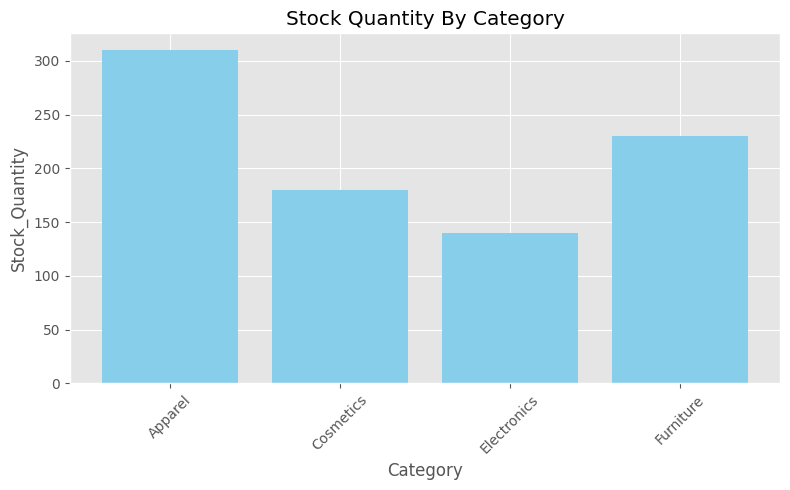

In [92]:
# Bar chart of stock quantity by category.

Stock_Quantity = (df.groupby('Category')['Stock_Quantity'].sum().sort_index())
plt.figure(figsize=(8, 5))
plt.bar(Stock_Quantity.index,Stock_Quantity.values, color='skyblue')

plt.style.use("ggplot")

plt.xlabel("Category")
plt.ylabel("Stock_Quantity")
plt.title("Stock Quantity By Category")
plt.xticks(rotation=45)
plt.tight_layout()

### 1. Apparel holds the highest stock with 310 units (≈ 36% of total inventory).
### 2. Furniture is second with 230 units (≈ 27%).
### 3. Cosmetics has 180 units (≈ 21% of total stock).
### 4. Electronics has the lowest stock at 140 units (≈ 16%).
### 5. Total stock across all categories is 860 units.
### 6. Inventory suggests overstocking in Apparel and understocking in Electronics, which may need rebalancing based on demand.

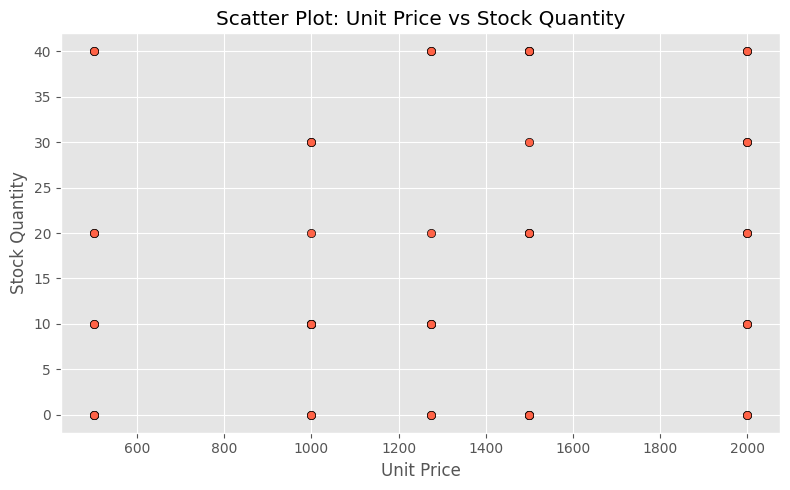

In [93]:
# Scatter plot between Unit_Price and Stock_Quantity to detect pricing anomalies.

plt.style.use("ggplot")
plt.figure(figsize=(8, 5))
plt.scatter(df['Unit_Price'], df['Stock_Quantity'], color='tomato', edgecolor='black')

plt.xlabel("Unit Price")
plt.ylabel("Stock Quantity")
plt.title("Scatter Plot: Unit Price vs Stock Quantity")
plt.tight_layout()

### 1. No strong correlation between Unit Price (₹500–₹2000) and Stock Quantity (0–40 units) — stock levels are not price-dependent.
### 2. Items priced at ₹1500–₹2000 show wide stock variation (0 to 40 units), indicating inconsistent stocking strategy for high-priced products.
### 3. Lower-priced items (₹500–₹1000) also range from 0 to 40 units, reflecting similar inconsistency.
### 4. Common price clusters observed at ₹1000, ₹1300, ₹1500, and ₹2000 — likely standardized pricing across categories.
### 5. Presence of stock quantity = 0 at multiple price points suggests potential stockouts, while max stock = 40 units at others may indicate overstocking.

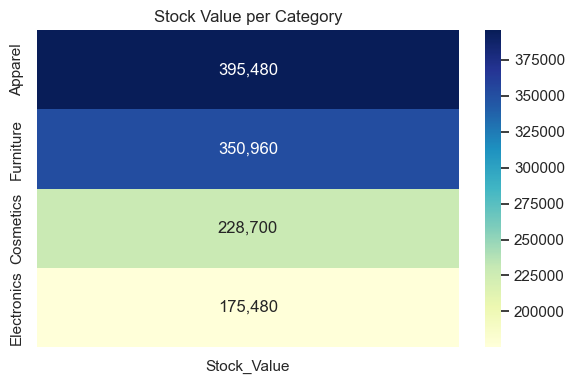

In [94]:
# Heatmap or pivot table (via seaborn) showing stock value per category.

pivot = (df.pivot_table(index='Category', values='Stock_Value', aggfunc='sum').sort_values('Stock_Value', ascending=False))

plt.figure(figsize=(6, 4))
sns.set_theme(style='white')

ax = sns.heatmap(pivot,annot=True, fmt=',.0f',cmap='YlGnBu')

ax.set_title("Stock Value per Category")
ax.set_xlabel("")
ax.set_ylabel("")
plt.tight_layout()

### 1. Apparel holds the highest stock value at ₹395,480 (≈ 33% of total).
### 2. Furniture follows with ₹350,960 (≈ 29% of total stock value).
### 3. Cosmetics has a stock value of ₹228,700 (≈ 19%).
### 4. Electronics has the lowest stock value at ₹175,480 (≈ 15%).
### 5. Total stock value across all categories = ₹1,150,620.
### 6. Major investment is concentrated in Apparel and Furniture (₹746,440 combined, ≈ 65%), indicating high inventory allocation in these two categories.

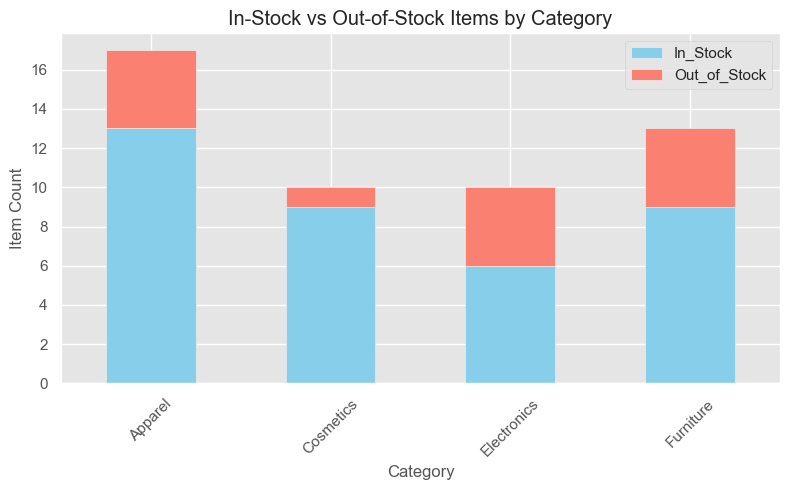

In [140]:
# Stacked bar showing in-stock vs out-of-stock items by Category.

plt.style.use("ggplot")
plt.figure(figsize=(8, 5))

(df.groupby(["Category", "Flag"]).size().unstack(fill_value=0).reindex(columns=["In_Stock", "Out_of_Stock"])
.plot(kind="bar",stacked=True,color=["skyblue", "salmon"],ax=plt.gca()))  

# Labels and formatting
plt.xlabel("Category")
plt.ylabel("Item Count")
plt.title("In-Stock vs Out-of-Stock Items by Category")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

### 1. Apparel: 17 items total → 13 In-Stock, 4 Out-of-Stock (≈ 76% in-stock).
### 2. Cosmetics: 10 items total → 9 In-Stock, 1 Out-of-Stock (≈ 90% in-stock).
### 3. Electronics: 10 items total → 5 In-Stock, 5 Out-of-Stock (50% in-stock — lowest).
### 4. Furniture: 13 items total → 9 In-Stock, 4 Out-of-Stock (≈ 69% in-stock).
### 5. Observation:
    1. Best availability: Cosmetics (90%).
    2. Most critical: Electronics (only 50% in-stock).
    3. Action needed: Replenish Electronics and monitor Apparel/Furniture gaps.